In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [24]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\문서\Datasets\housing.csv")

In [25]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
data.shape

(20640, 10)

### Exploratory Data analysis

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

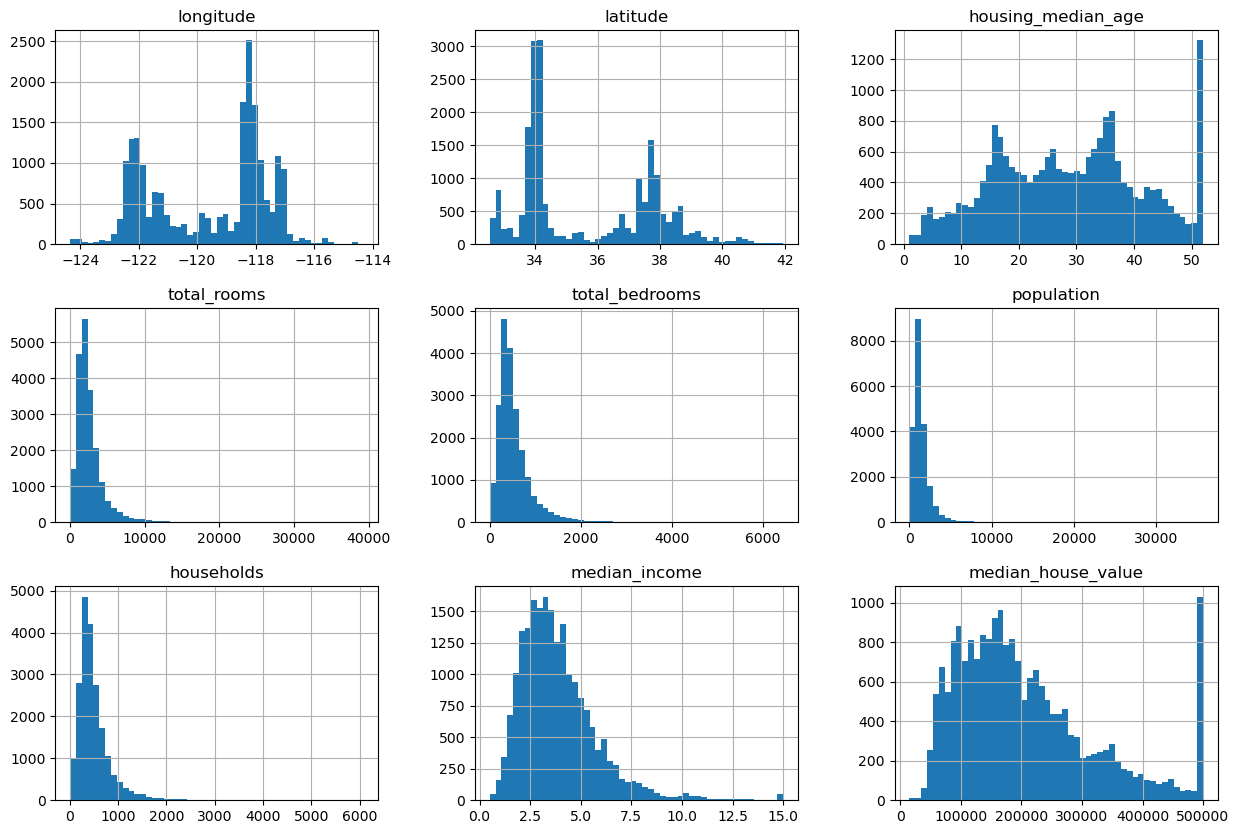

In [29]:
data.hist(bins=50,figsize=(15,10))

<Axes: xlabel='longitude', ylabel='latitude'>

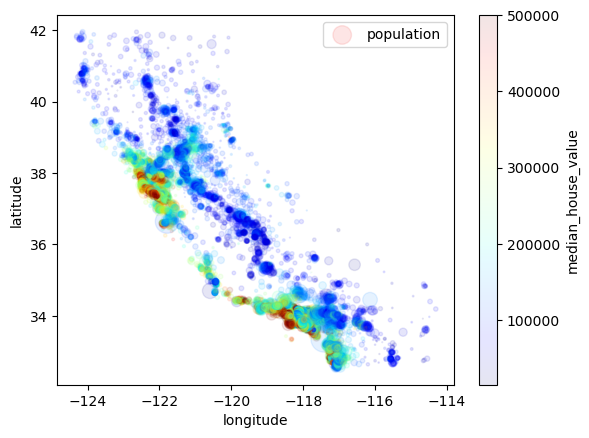

In [30]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=data["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"))

In [31]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [32]:
data=pd.get_dummies(data,columns=['ocean_proximity'],drop_first=True)

In [33]:
x = data.drop('median_house_value',axis=1)

In [34]:
y=data['median_house_value']

### Train test split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Training

In [36]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [37]:
y_pred=model.predict(x_test)

In [38]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE", mae)
print("MSE", mse)
print("R2 Score", r2)

MAE 50670.73824097213
MSE 4908476721.156613
R2 Score 0.6254240620553608


### Predicted vs Actual plot

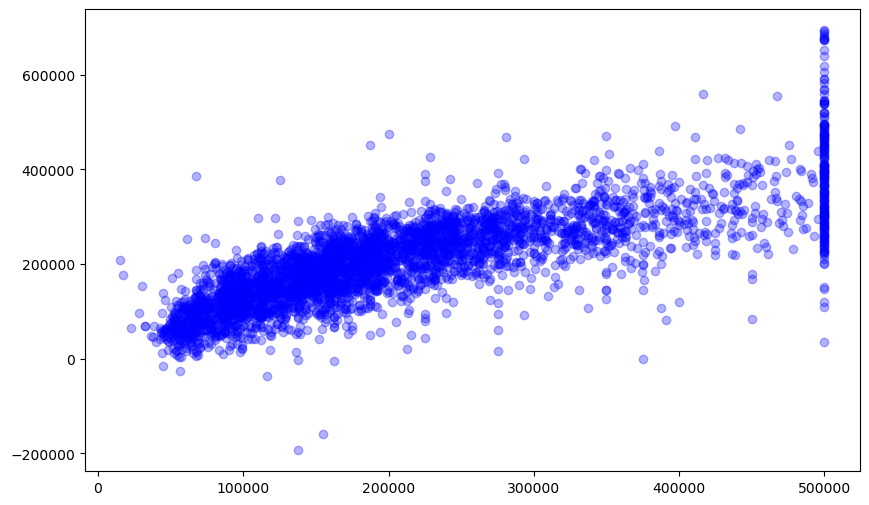

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.3,color='blue')

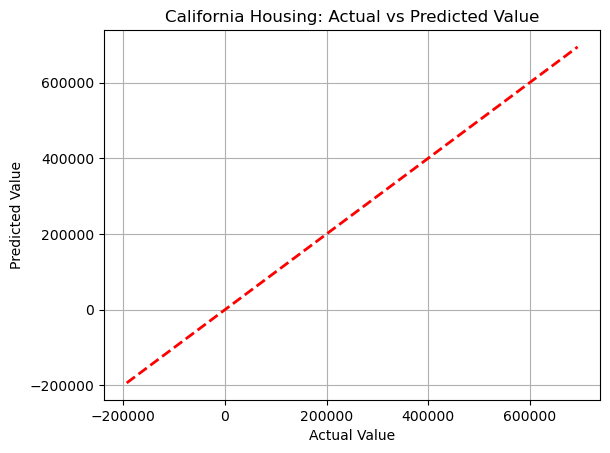

In [39]:
max_val = max(y_test.max(),y_pred.max())
min_val = min(y_test.min(),y_pred.min())
plt.plot([min_val,max_val],[min_val,max_val],color='red',lw=2,linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('California Housing: Actual vs Predicted Value')
plt.grid(True)
plt.show()
